In [170]:
import pandas as pd
import os
from utils import *
%matplotlib inline

In [114]:
def _equal_search(df, key, val, sort_by='period'):
    result_df = df[df[key] == val]
    return result_df.sort_values(by=sort_by)
def _contain_search(df, key, val, sort_by='period'):
    result_df = df[df[key].str.contains(val, na=False)]
    return result_df.sort_values(by=sort_by)

In [181]:
base_dir = os.path.dirname(os.path.abspath(''))
filepath = os.path.join(base_dir, 'output', 'top5-frequency-emerging_topic_score-strength_20191215-20-08-02.csv')
df = pd.read_csv(filepath)
df.head()

,top5_criteria,period_category,period,bigram,frequency,emerging_topic_score,strength
0,frequency,quarterly,1998_Q1,risk-capital,47,7.520000,24.294227
1,frequency,quarterly,1998_Q1,regulatory-capital,44,88.000000,14.666672
2,frequency,quarterly,1998_Q1,capital-standard,40,80.000000,10.003956
3,frequency,quarterly,1998_Q1,price-index,36,5.142857,16.269189
4,frequency,quarterly,1998_Q1,capital-requirement,36,16.000000,6.009372


In [239]:
period = '2019_Q3'
top5_criteria = 'emerging_topic_score'

df_ = _contain_search(_equal_search(df, 'period_category', 'quarterly'), 'period', period)
_equal_search(df_, 'top5_criteria', top5_criteria).sort_values(by=top5_criteria, ascending=False)[['bigram', top5_criteria]]

,bigram,emerging_topic_score
1195,inflation-era,72.0
1196,great-era,56.0
1197,expansion-era,56.0
1198,era-great,52.0
1199,pce-real,52.0


In [250]:
target_keyword = 'inflation'
top5_criteria = 'strength'

df_sub = _contain_search(_equal_search(df, 'period_category', 'quarterly'), 'bigram', target_keyword)
df_sub
_equal_search(df_sub, 'top5_criteria', top5_criteria).sort_values(by=top5_criteria, ascending=False)[['period', 'bigram', 'frequency', 'strength']]

,period,bigram,frequency,strength
1720,2007_Q3,inflation-expectation,207,104.639870
1740,2008_Q3,price-inflation,41,98.156642
1735,2008_Q2,inflation-expectation,73,96.683350
1880,2015_Q3,price-inflation,180,95.718113
1725,2007_Q4,inflation-expectation,26,95.444805
1730,2008_Q1,price-inflation,61,94.993818
1736,2008_Q2,price-inflation,77,93.879446
1885,2015_Q4,price-inflation,31,92.297901
1731,2008_Q1,inflation-expectation,30,88.042848
1741,2008_Q3,inflation-expectation,16,87.607357


In [ ]:
df_sub_dict = dict()
df_sub_dict['frequency'] = _equal_search(df_sub, 'top5_criteria', 'frequency')
df_sub_dict['strength'] = _equal_search(df_sub, 'top5_criteria', 'strength')
df_sub_dict['emerging_topic_score'] = _equal_search(df_sub, 'top5_criteria', 'emerging_topic_score')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

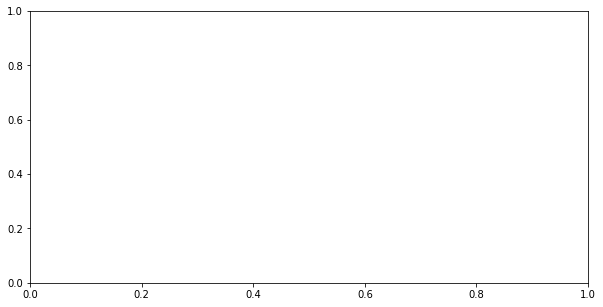

In [204]:
import numpy as np
import matplotlib.pyplot as plt

N = len(df_sub['period'].unique())
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = df_sub_dict['frequency']['frequency']
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = df_sub_dict['strength'].values
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = df_sub_dict['emerging_topic_score'].values
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( (df_sub['period'].unique()) )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('frequency', 'strength', 'emerging_topic_score') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.rcParams["figure.figsize"] = (10,5)
plt.show()